# Лабораторная работа 1
## «Предобработка данных. Исследовательский анализ данных»

**Постановка задачи**: Заказчик – кредитный отдел банка, входные данные от банка — статистика о платёжеспособности клиентов. Требуется построить модель кредитного скоринга, которая позволит оценить способность потенциального заёмщика вернуть кредит банку.

**Описание данных**
* children – количество детей в семье;
* days_employed – общий трудовой стаж в днях;
* dob_years – возраст клиента в годах;
* education – уровень образования клиента;
* education_id – идентификатор уровня образования;
* family_status – семейное положение;
* family_status_id – идентификатор семейного положения;
* gender – пол клиента;
* income_type – тип занятости;
* debt – имел ли задолженность по возврату кредитов (1 – имел, 0 – не имел);
* total_income – ежемесячный доход;
* purpose – цель получения кредита.



## 1. Откройте таблицу и изучите общую информацию о данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("./data/data.csv")

In [3]:
print(f"Количество строк: {dataset.shape[0]}\nКоличество столбцов: {dataset.shape[1]}")

Количество строк: 21525
Количество столбцов: 12


In [4]:
# Вывод первых 5 строк
dataset.head()

children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  
3  дополнительное образование  
4             сыграть свадьбу

In [5]:
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
dataset.describe(percentiles=percentiles, include="all")

children  days_employed     dob_years education  education_id  \
count   21525.000000   19351.000000  21525.000000     21525  21525.000000   
unique           NaN            NaN           NaN        15           NaN   
top              NaN            NaN           NaN   среднее           NaN   
freq             NaN            NaN           NaN     13750           NaN   
mean        0.538908   63046.497661     43.293380       NaN      0.817236   
std         1.381587  140827.311974     12.574584       NaN      0.548138   
min        -1.000000  -18388.949901      0.000000       NaN      0.000000   
1%          0.000000  -10697.267671     21.000000       NaN      0.000000   
5%          0.000000   -6622.968349     25.000000       NaN      0.000000   
10%         0.000000   -4779.926832     27.000000       NaN      0.000000   
25%         0.000000   -2747.423625     33.000000       NaN      1.000000   
50%         0.000000   -1203.369529     42.000000       NaN      1.000000   
75%         1.000000    -291.095954     53.000000       NaN      1.000000   
90%         2.000000  360310.974923     60.000000       NaN      1.000000   
95%         2.000000  380718.999304     64.000000       NaN      1.000000   
99%         3.000000  397588.993236     69.000000       NaN      3.000000   
max        20.000000  401755.400475     75.000000       NaN      4.000000   

          family_status  family_status_id gender income_type          debt  \
count             21525      21525.000000  21525       21525  21525.000000   
unique                5               NaN      3           8           NaN   
top     женат / замужем               NaN      F   сотрудник           NaN   
freq              12380               NaN  14236       11119           NaN   
mean                NaN          0.972544    NaN         NaN      0.080883   
std                 NaN          1.420324    NaN         NaN      0.272661   
min                 NaN          0.000000    NaN         NaN      0.000000   
1%                  NaN          0.000000    NaN         NaN      0.000000   
5%                  NaN          0.000000    NaN         NaN      0.000000   
10%                 NaN          0.000000    NaN         NaN      0.000000   
25%                 NaN          0.000000    NaN         NaN      0.000000   
50%                 NaN          0.000000    NaN         NaN      0.000000   
75%                 NaN          1.000000    NaN         NaN      0.000000   
90%                 NaN          4.000000    NaN         NaN      0.000000   
95%                 NaN          4.000000    NaN         NaN      1.000000   
99%                 NaN          4.000000    NaN         NaN      1.000000   
max                 NaN          4.000000    NaN         NaN      1.000000   

        total_income  purpose  
count   1.935100e+04    21525  
unique           NaN       38  
top              NaN  свадьба  
freq             NaN      797  
mean    1.674223e+05      NaN  
std     1.029716e+05      NaN  
min     2.066726e+04      NaN  
1%      4.365679e+04      NaN  
5%      6.332285e+04      NaN  
10%     7.609510e+04      NaN  
25%     1.030532e+05      NaN  
50%     1.450179e+05      NaN  
75%     2.034351e+05      NaN  
90%     2.784149e+05      NaN  
95%     3.405901e+05      NaN  
99%     5.172068e+05      NaN  
max     2.265604e+06      NaN

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


[Text(0.5, 1.0, 'Тепловая карта пропущенных значений')]

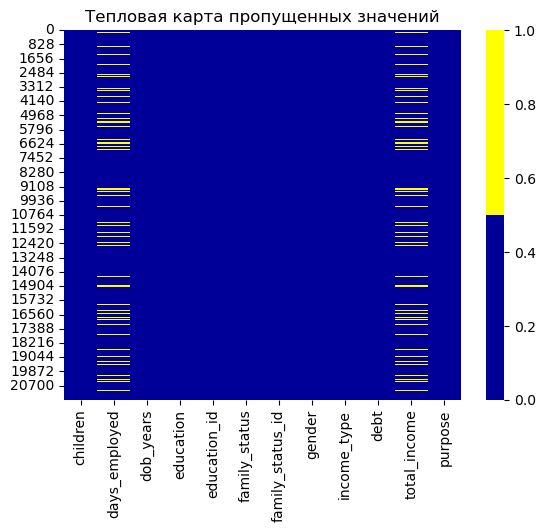

In [7]:
# количество пропущенных значений в каждом столбце
print(dataset.isna().sum())

colours = ['#000099', '#ffff00']
plot = sns.heatmap(dataset.isna(), cmap=sns.color_palette(colours))
plot.set(title="Тепловая карта пропущенных значений")

**Вывод:**

1. children: пропусков нет, тип данных целочисленный

1. days_employed: пропуски есть, тип данных вещественный

1. dob_years: пропусков нет, тип данных целочисленный

1. education: пропусков нет, тип данных строка

1. education_id: пропусков нет, тип данных целочисленный

1. family_status: пропусков нет, тип данных строка

1. family_status_id: пропусков нет, тип данных целочисленный

1. gender: пропусков нет, тип данных строка

1. income_type: пропусков нет, тип данных строка

1. debt: пропусков нет, тип данных целочисленный

1. total_income: пропуски есть, тип данных вещественный

1. purpose: пропусков нет, тип данных строка

## 2. Проведите предобработку данных. Выполните декомпозицию задач данного этапа. Оформите подробные выводы по результатам.

[Text(0.5, 1.0, 'Тепловая карта пропущенных значений, после удаления пропусков у одних и тех же людей')]

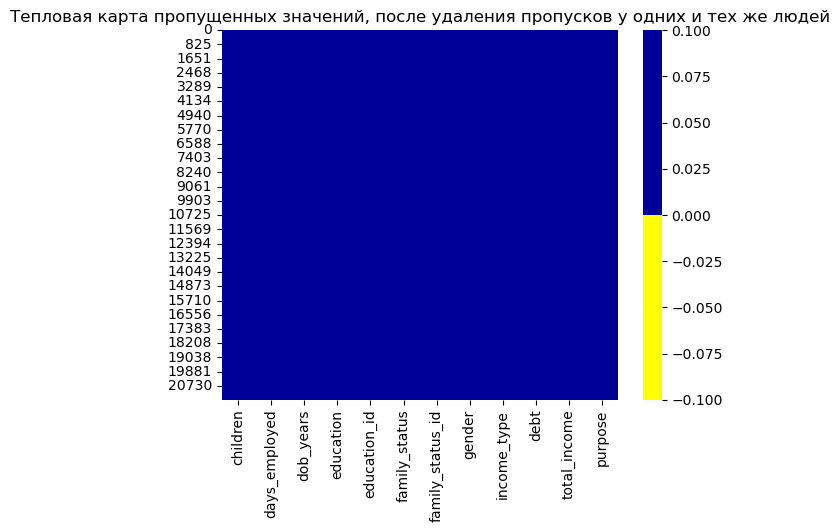

In [8]:
# проверяем что все пропущенные значения у одних и тех же людей
# убираем пропущенные значения
dataset = dataset.drop(np.where(dataset['days_employed'].isnull() & dataset['total_income'].isnull())[0])

colours = ['#ffff00', '#000099']
plot = sns.heatmap(dataset.isna(), cmap=sns.color_palette(colours))

# Как видно из тепловой карты, пропущенные значения действительно были у одних и тех же людей
plot.set(title="Тепловая карта пропущенных значений, после удаления пропусков у одних и тех же людей")

In [9]:
# значения в столбце с количеством их вхождений
dataset["education"] = dataset["education"].apply(lambda x: x.lower())

col = dataset.columns
for el in col:
    print(el, "\n", dataset[el].value_counts(), end=f"\n{'-'*25}\n")

children 
  0     12710
 1      4343
 2      1851
 3       294
 20       67
-1        44
 4        34
 5         8
Name: children, dtype: int64
-------------------------
days_employed 
 -8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64
-------------------------
dob_years 
 35    553
41    548
38    544
40    543
34    534
42    532
33    530
39    522
44    503
29    495
31    495
48    492
36    492
37    484
30    482
32    473
43    463
50    463
49    458
27    457
45    447
28    446
56    433
52    431
46    427
54    424
47    421
53    415
59    410
58    405
57    404
51    398
55    395
26    373
60    338
25    334
61    317
62    314
24    243
63    240
64    228
23    218
65    174
22    166
66    163
67    151
21     93
0      91
68     90
69     80
70     

In [10]:
# Лемматизация категориальных данных

# паттерны (корни) слов, которые объединяют схожие данные в одни
pattern = {
    "свадьб": "свадьба",
    "недвижимост": "жильё",
    "жиль": "жильё",
    "автомобил": "автомобиль",
    "образован": "образование"
}
for pat in pattern.keys():
    # номральизация категориальных данных столбца "purpose" (цель кредита)
    print("-"*8, "\n", pat, "\n", dataset[dataset["purpose"].str.contains(pat)]["purpose"].value_counts())

-------- 
 свадьб 
 свадьба                  721
сыграть свадьбу          693
на проведение свадьбы    685
Name: purpose, dtype: int64
-------- 
 недвижимост 
 операции с недвижимостью                  615
покупка коммерческой недвижимости         597
операции с коммерческой недвижимостью     581
строительство жилой недвижимости          580
недвижимость                              572
строительство недвижимости                561
строительство собственной недвижимости    560
операции со своей недвижимостью           559
покупка недвижимости                      552
покупка жилой недвижимости                546
Name: purpose, dtype: int64
-------- 
 жиль 
 покупка жилья              595
покупка жилья для сдачи    588
жилье                      587
операции с жильем          579
покупка своего жилья       574
покупка жилья для семьи    570
ремонт жилью               542
Name: purpose, dtype: int64
-------- 
 автомобил 
 автомобиль                            454
на покупку своего автомо

In [11]:
# Проверка что мы нормализовали данные
for pat, val in pattern.items():
    dataset.loc[dataset["purpose"].str.contains(pat, case=False), "purpose"] = val
print(dataset["purpose"].value_counts())
dataset

жильё          9758
автомобиль     3897
образование    3597
свадьба        2099
Name: purpose, dtype: int64


children  days_employed  dob_years education  education_id  \
0             1   -8437.673028         42    высшее             0   
1             1   -4024.803754         36   среднее             1   
2             0   -5623.422610         33   среднее             1   
3             3   -4124.747207         32   среднее             1   
4             0  340266.072047         53   среднее             1   
...         ...            ...        ...       ...           ...   
21520         1   -4529.316663         43   среднее             1   
21521         0  343937.404131         67   среднее             1   
21522         1   -2113.346888         38   среднее             1   
21523         3   -3112.481705         38   среднее             1   
21524         2   -1984.507589         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   
1       женат / замужем                 0      F   сотрудник     0   
2       женат / замужем                 0      M   сотрудник     0   
3       женат / замужем                 0      M   сотрудник     0   
4      гражданский брак                 1      F   пенсионер     0   
...                 ...               ...    ...         ...   ...   
21520  гражданский брак                 1      F   компаньон     0   
21521   женат / замужем                 0      F   пенсионер     0   
21522  гражданский брак                 1      M   сотрудник     1   
21523   женат / замужем                 0      M   сотрудник     1   
21524   женат / замужем                 0      F   сотрудник     0   

        total_income      purpose  
0      253875.639453        жильё  
1      112080.014102   автомобиль  
2      145885.952297        жильё  
3      267628.550329  образование  
4      158616.077870      свадьба  
...              ...          ...  
21520  224791.862382        жильё  
21521  155999.806512   автомобиль  
21522   89672.561153        жильё  
21523  244093.050500   автомобиль  
21524   82047.418899   автомобиль  

[19351 rows x 12 columns]

In [12]:
dataset["children"] = dataset["children"].apply(lambda x: abs(x))
dataset.loc[dataset["children"] == 20, "children"] = 2

dataset["children"].value_counts()

0    12710
1     4387
2     1918
3      294
4       34
5        8
Name: children, dtype: int64

In [13]:
# Перевод "days_employed" из дней в года
dataset["days_employed"] = dataset["days_employed"].apply(lambda x: abs(x) / 30 / 365)

dataset["days_employed"]

0         0.770564
1         0.367562
2         0.513555
3         0.376689
4        31.074527
           ...    
21520     0.413636
21521    31.409809
21522     0.193000
21523     0.284245
21524     0.181234
Name: days_employed, Length: 19351, dtype: float64

<Axes: >

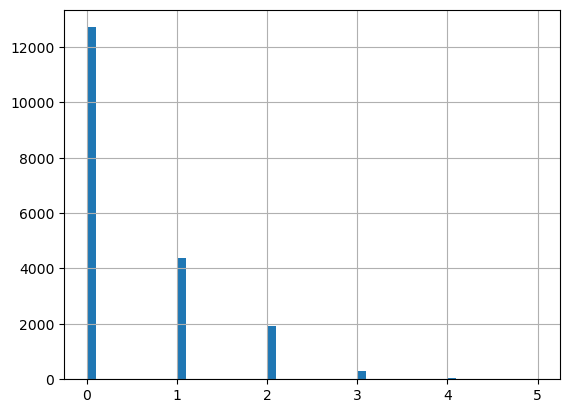

In [14]:
# кол-во детей в семье
dataset["children"].hist(bins=50)

<Axes: >

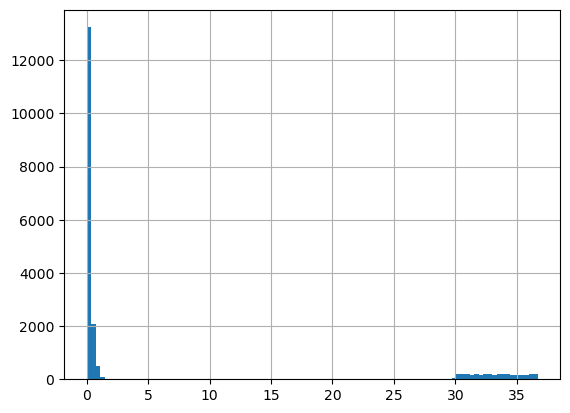

In [15]:
# общий трудовой стаж в годах
dataset["days_employed"].hist(bins=100)

<Axes: >

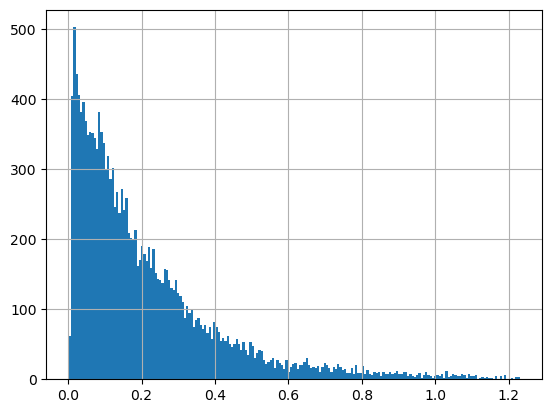

In [16]:
# Основная масса данных по стажу
dataset[(dataset["days_employed"] < dataset["days_employed"].quantile(0.82))]["days_employed"].hist(bins=200) 

<Axes: >

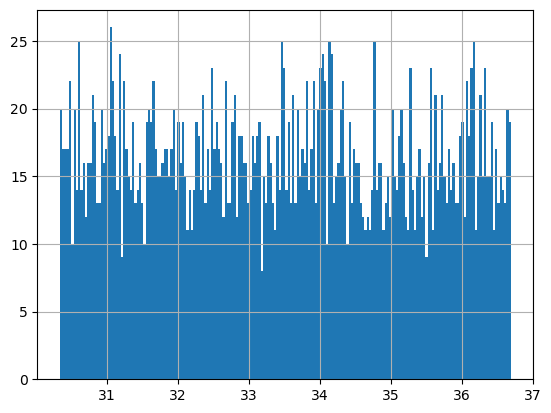

In [17]:
# Аномально высокие данные
dataset[(dataset["days_employed"] >= dataset["days_employed"].quantile(0.83))]["days_employed"].hist(bins=200) 

<Axes: >

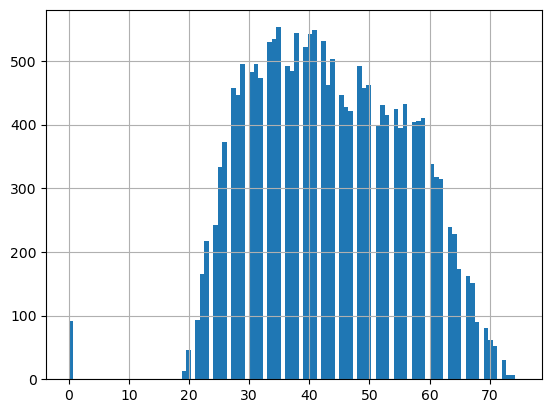

In [18]:
# возраст клиента в годах
dataset["dob_years"].hist(bins=100)

In [19]:
# Нули в "dob_years" заменяем 1 персентилем который равен 21
dataset['dob_years'] = dataset['dob_years'].replace(0, dataset['dob_years'].quantile(0.01))

<Axes: >

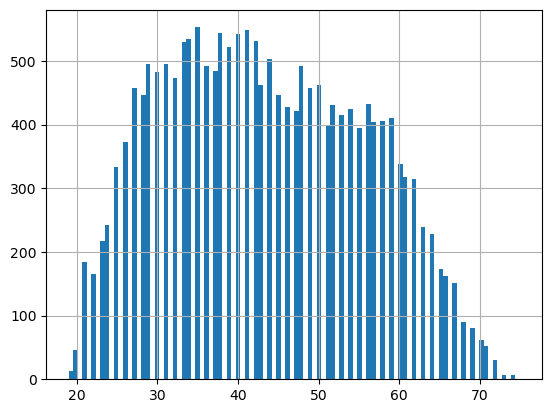

In [20]:
dataset["dob_years"].hist(bins=100)

<Axes: >

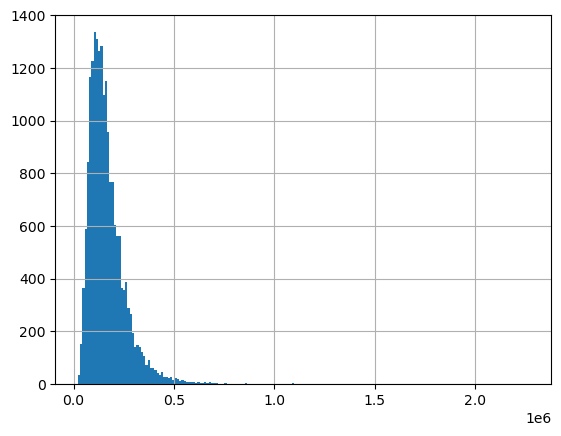

In [21]:
# ежемесячный доход
dataset["total_income"].hist(bins=200)

In [22]:
values = []
labels = []
for i, v in dataset["gender"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels)
fig.show()

In [23]:
# пример избавления от аномальных величин с помощью квантилей
q_low = dataset["days_employed"].quantile(0.01)
q_hi = dataset["days_employed"].quantile(0.99)

df_filtered = dataset[(dataset["days_employed"] < q_hi) & (dataset["days_employed"] > q_low)]
df_filtered.shape

(18963, 12)

In [24]:
print("Процент нулевых значений по столбцам относительно самих себя")
for el in col:
    print(el, "\n", f"{round(dataset[dataset[el] == 0][el].count() / dataset[el].count(), 4) * 100}%")

Процент нулевых значений по столбцам относительно самих себя
children 
 65.68%
days_employed 
 0.0%
dob_years 
 0.0%
education 
 0.0%
education_id 
 24.37%
family_status 
 0.0%
family_status_id 
 57.58%
gender 
 0.0%
income_type 
 0.0%
debt 
 91.88%
total_income 
 0.0%
purpose 
 0.0%


In [25]:
print("Процент занятости людей с нулевым опытом работы:")
i = 0
for el in dataset[dataset["dob_years"] == 0]["income_type"].value_counts().index:
    print(f"{el} - {round((dataset[dataset['dob_years'] == 0]['income_type'].value_counts()[i]) / dataset.shape[0], 4) * 100}%")
    i += 1

Процент занятости людей с нулевым опытом работы:


In [26]:
# Количество дубликатов
dataset.duplicated().sum()

0

In [27]:
# Пропуски
dataset.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [28]:
# Уникальные значения пола и их количество
dataset["gender"].value_counts()

F      12752
M       6598
XNA        1
Name: gender, dtype: int64

In [29]:
# Избавлячемся от спорного значения XNA
dataset = dataset[dataset["gender"].isin(["XNA"]) == False]
dataset["gender"].value_counts()

F    12752
M     6598
Name: gender, dtype: int64

In [30]:
# Есть ли зависимость между наличием детей и возвратом кредита в срок?
dataset[["children", "debt"]].corr()

children      debt
children  1.000000  0.025974
debt      0.025974  1.000000

In [31]:
values = []
labels = []
for i, v in dataset[dataset["debt"] == 0]["children"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение количества детей к отсутствию задолженности")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["debt"] == 1]["children"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение количества детей к наличию задолженности")
fig.show()

In [32]:
values = []
labels = []
for i, v in dataset[dataset["debt"] == 0]["children"].value_counts().items():
    labels.append(0 if i == 0 else 1)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение количества детей к отсутствию задолженности")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["debt"] == 1]["children"].value_counts().items():
    labels.append(0 if i == 0 else 1)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение количества детей к наличию задолженности")
fig.show()

**Как видно из графиков, соотношение количества детей примерно равное для наличия/отсутсвия задолженности (зависимости нет)**

In [33]:
# Есть ли зависимость между семейным положением и возвратом кредита в срок?
dataset['family_status_factorize'] = pd.factorize(dataset['family_status'])[0]
dataset[["family_status_factorize", "debt"]].corr()

family_status_factorize      debt
family_status_factorize                 1.000000  0.022323
debt                                    0.022323  1.000000

In [34]:
values = []
labels = []
for i, v in dataset[dataset["debt"] == 0]["family_status"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение семейного положения к отсутствию задолженности")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["debt"] == 1]["family_status"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение семейного положения к наличию задолженности")
fig.show()

**Как видно из графиков, соотношение семейного положения примерно равное для наличия/отсутсвия задолженности (зависимости нет)**

In [35]:
# Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
dataset[["total_income", "debt"]].corr()

total_income     debt
total_income       1.00000 -0.01247
debt              -0.01247  1.00000

In [36]:
def total_income_transform(x):
    if x < dataset["total_income"].quantile(0.25):
        return "0-25%"
    elif x < dataset["total_income"].quantile(0.5):
        return "25-50%"
    elif x < dataset["total_income"].quantile(0.75):
        return "50-75%"
    return "75-100%"

dataset["total_income_categorical"] = dataset["total_income"].transform(total_income_transform)

In [37]:
dataset['total_income_categorical_factorize'] = pd.factorize(dataset['total_income_categorical'])[ 0 ]
dataset[["total_income_categorical_factorize", "debt"]].corr()

total_income_categorical_factorize  \
total_income_categorical_factorize                            1.000000   
debt                                                          0.011085   

                                        debt  
total_income_categorical_factorize  0.011085  
debt                                1.000000

In [38]:
values = []
labels = []
for i, v in dataset[dataset["debt"] == 0]["total_income_categorical"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение уровня дохода (отношение в квантилях) к отсутствию задолженности")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["debt"] == 1]["total_income_categorical"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение уровня дохода (отношение в квантилях) к наличию задолженности")
fig.show()

**Как видно из графиков, соотношение уровня дохода к наличию/отсутствию задолженности:**

* люди с доходом 75-100% реже всего имеют задолженность и чаще всего имеют отсутвие задолженности

* люди с доходом 0-25% и 25-50%  примерно в равном соотношение в обоих случаях

* люди с доходом 50-75% чаще всего имеют задолженности и реже всего имеют отсутвие задолженности

In [39]:
# Как разные цели кредита влияют на его возврат в срок?
dataset['purpose_factorize'] = pd.factorize(dataset['purpose'])[ 0 ]
dataset[["purpose_factorize", "debt"]].corr()

purpose_factorize      debt
purpose_factorize           1.000000  0.016368
debt                        0.016368  1.000000

In [40]:
values = []
labels = []
for i, v in dataset[dataset["debt"] == 0]["purpose"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение целей кредита к отсутствию задолженности")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["debt"] == 1]["purpose"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="Соотношение целей кредита к наличию задолженности")
fig.show()

**Как видно из графиков, соотношение целей кредита примерно равное для наличия/отсутсвия задолженности (зависимости нет)**

[Text(0.5, 1.0, 'Корреляционная матрица')]

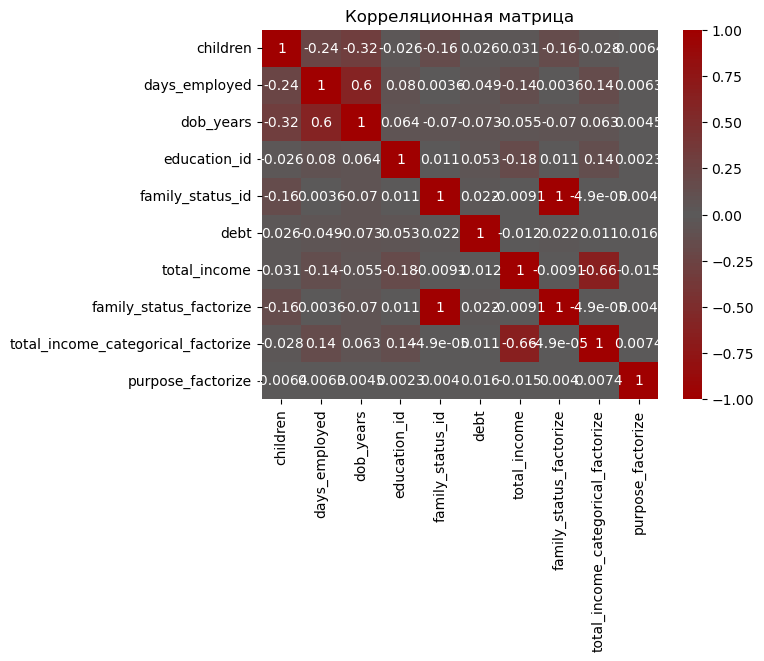

In [41]:
# корреляционная матрица
colors = [
    (160/255, 0/255, 0/255),
    (90/255, 90/255, 90/255),
    (160/255, 0/255, 0/255)
]

corr = dataset.corr()
plot = sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    cmap=LinearSegmentedColormap.from_list("MyPallet", colors, N=100),
    annot=True,
    vmin=-1,
    vmax=1
)
plot.set(title="Корреляционная матрица")

In [42]:
def dob_years_transform(x):
    if x < dataset["dob_years"].quantile(0.25):
        return "0-25%"
    elif x < dataset["dob_years"].quantile(0.5):
        return "25-50%"
    elif x < dataset["dob_years"].quantile(0.75):
        return "50-75%"
    return "75-100%"


def days_employed_transform(x):
    if x < dataset["days_employed"].quantile(0.25):
        return "0-25%"
    elif x < dataset["days_employed"].quantile(0.5):
        return "25-50%"
    elif x < dataset["days_employed"].quantile(0.75):
        return "50-75%"
    return "75-100%"

dataset["dob_years_categorical"] = dataset["dob_years"].transform(dob_years_transform)
dataset["days_employed_categorical"] = dataset["days_employed"].transform(days_employed_transform)

In [43]:
values = []
labels = []
for i, v in dataset[dataset["dob_years_categorical"] == "0-25%"]["days_employed_categorical"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="0-25% возраста клиентов/общий трудовой стаж в днях")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["dob_years_categorical"] == "25-50%"]["days_employed_categorical"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="25-50% возраста клиентов/общий трудовой стаж в днях")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["dob_years_categorical"] == "50-75%"]["days_employed_categorical"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="50-75% возраста клиентов/общий трудовой стаж в днях")
fig.show()

values = []
labels = []
for i, v in dataset[dataset["dob_years_categorical"] == "75-100%"]["days_employed_categorical"].value_counts().items():
    labels.append(i)
    values.append(v)

fig = px.pie(values=values, names=labels, title="75-100% возраста клиентов/общий трудовой стаж в днях")
fig.show()

**Как видно из графиков, соотношение возраста к стажу:**

* люди с возрастом 75-100% больше всего занимают трудового стажа (75-100%)

* люди с возрастом 25-50% занимают аналогичный размер стажа (25-50% и 50-75%)

* люди с возрастом 0-25% занимают аналогичный размер стажа (0-25%)


In [44]:
# Сохраняем предобработанный датасет
dataset.to_csv("./data/data_correct.csv")